# forecast the sales for the upcoming 1 year in furniture category on the basis of historical data
 in reinforcement  ML null values are replaced by previous value
#here next value is dependent upon previous value

In [1]:
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
#pip install xlrd    #for excel file 

In [3]:
df=pd.read_excel('Sample_Superstore.xls',header=0) #importing dataset

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## data preprocessing

In [5]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [6]:
furniture = df[df['Category']=="Furniture"]
furniture.shape

(2121, 21)

In [7]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [8]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
technology = df[df['Category']=="Technology"]
technology.shape

(1847, 21)

In [10]:
technology.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [11]:
office_supplies= df[df['Category']=="Office Supplies"]

In [12]:
office_supplies.shape

(6026, 21)

In [13]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])   
#for converting into date time

In [14]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [15]:
furniture=furniture[['Order Date','Sales']]
furniture.shape

(2121, 2)

In [16]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [17]:
furniture = furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [18]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [19]:
furniture['Order Date'].value_counts()

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

In [20]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [21]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [22]:
furniture = furniture.set_index('Order Date')  

In [23]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [24]:
y = furniture['Sales'].resample("M").mean() #because there are missing dates and value of them we are grouping it in weekly basis and taking the mean of the days so that the algorithm can work

In [25]:
print(y.shape)

(48,)


In [26]:
y

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

In [27]:
#we cannot use train test split we manually have to decide the train and test data

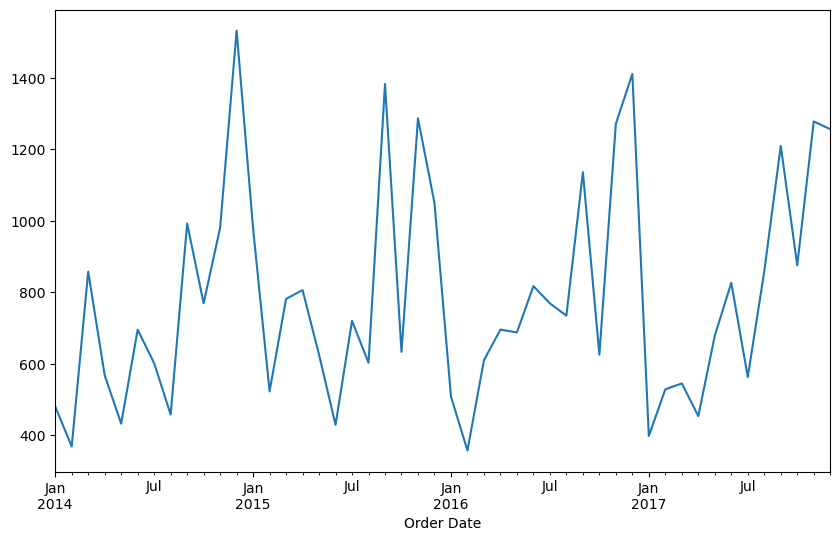

In [28]:
y.plot(figsize=(10,6))
plt.show()

In [29]:
train=y.loc[:'2016-12-31']   
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [30]:
test = y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

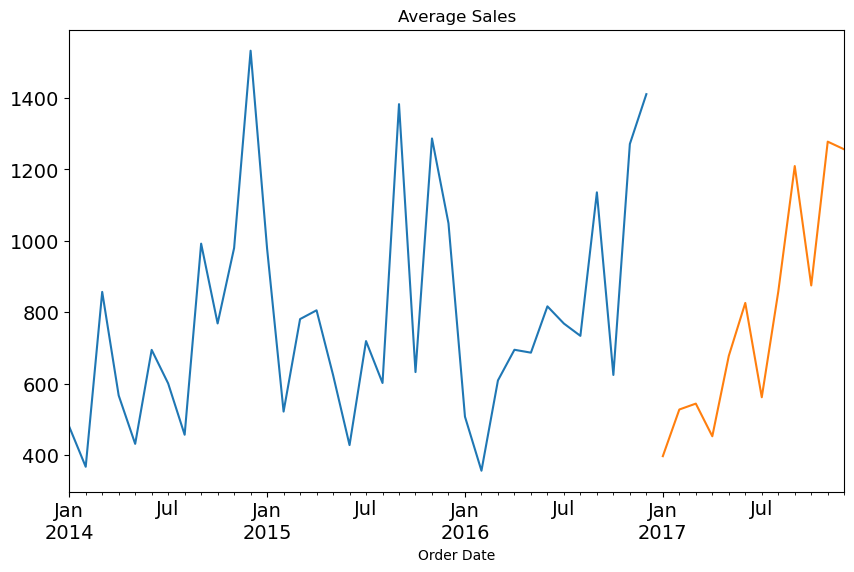

In [31]:
#plotting data
train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

# Simple Exponential Smoothing Model

C:\Users\amanp\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


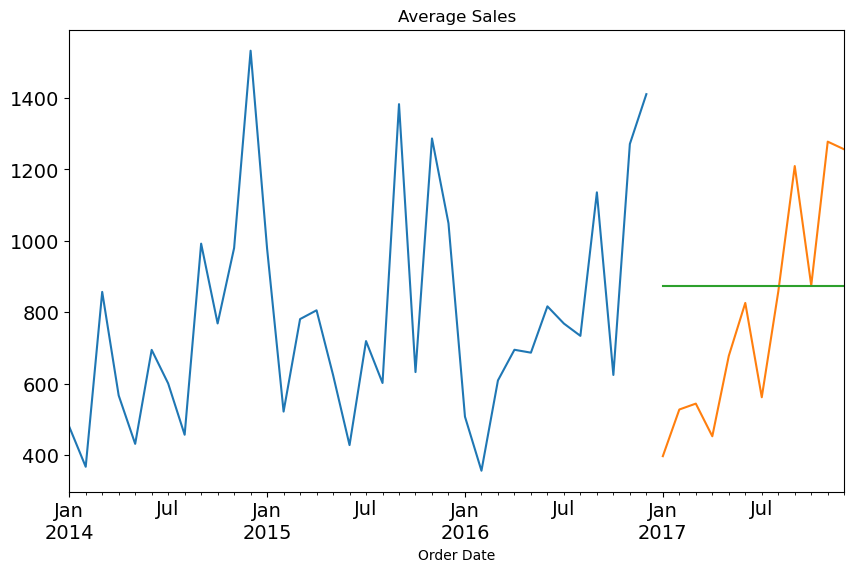

In [32]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level = alpha
#alpha values should be in the range of 0 to 1
#values close to 0 indicate that older values are very less important compared to recent values
#values close to 1 indicate that older values are equally important

fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)
Exp_Smooth['SES'] = fit1. forecast(steps=len(test))

train.plot(figsize=(10,6),title = 'Average Sales' , fontsize=14)
test.plot(figsize=(10,6),title  = 'Average Sales',fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6),title = 'Average Sales',fontsize=14)
plt.show()

In [33]:
#this above model does not predict accurately beacuse there are no conditions given on trend and seasonality

In [34]:
#RMSE is used to compare diff model with same algo but diff data/parameter
#choose the model with lowest RMSE value 


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)   #371 is the actual diff between actual and predicted 

315.0328571018992


# Holt Model

C:\Users\amanp\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


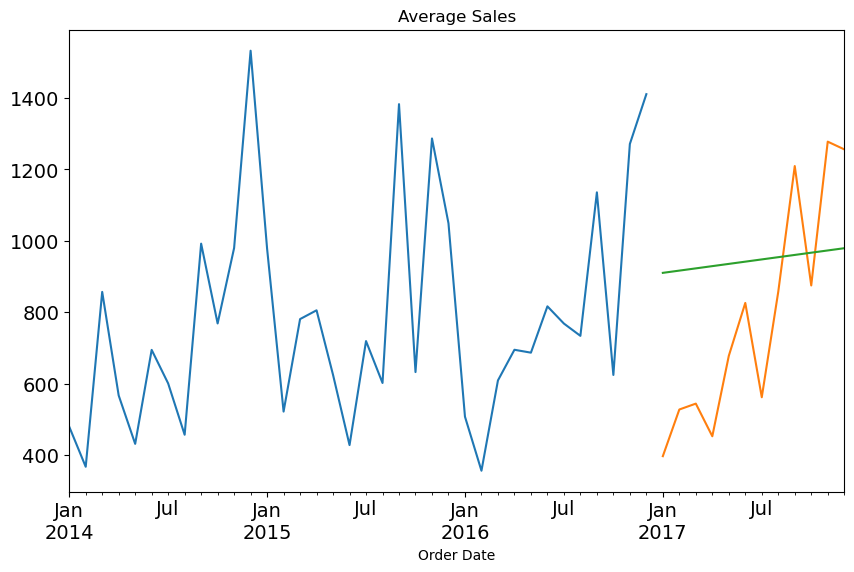

In [35]:
from statsmodels.tsa.api import Holt   #in this we give the slope but then this is also not accurate
Holt_df = test.copy()
#smoothing level = beta 
#alpha value should be in the range of 0 to 1
##values close to 0 indicate that older values are very less important compared to recent values
#values close to 1 indicate that older values are equally important
fit1 = Holt(train).fit(smoothing_level=0.1,smoothing_slope = 0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6),title = 'Average Sales' , fontsize=14)
test.plot(figsize=(10,6),title  = 'Average Sales',fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)   

324.2370497814364


# Holt-Winter Model

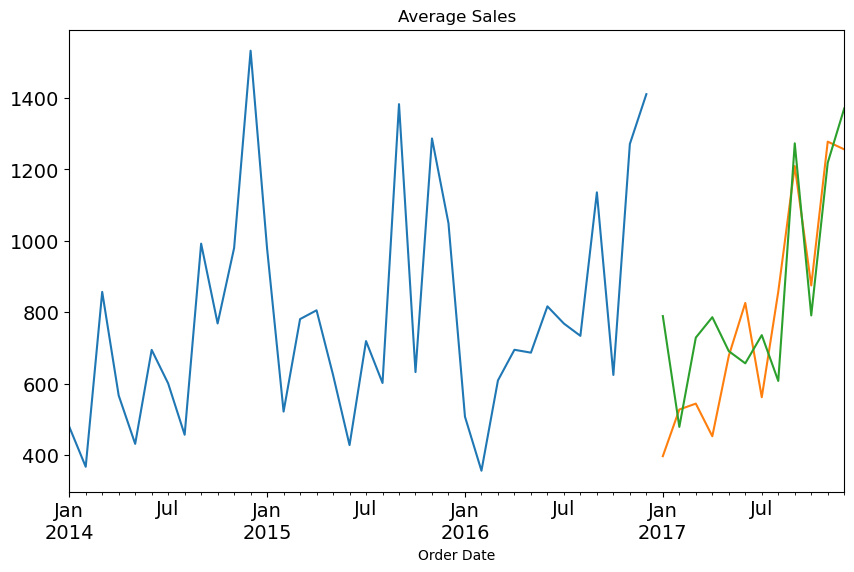

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing   #here we are giving both trend and seasonalities so that the model will predict better
Holt_Winter_df = test.copy()
#smoothing level = gama
fit1 = ExponentialSmoothing(train , seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
train.plot(figsize=(10,6),title = 'Average Sales' , fontsize=14)
test.plot(figsize=(10,6),title  = 'Average Sales',fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6),title = 'Average Sales',fontsize=14)
plt.show()
                                   


In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)   

193.7115288576619


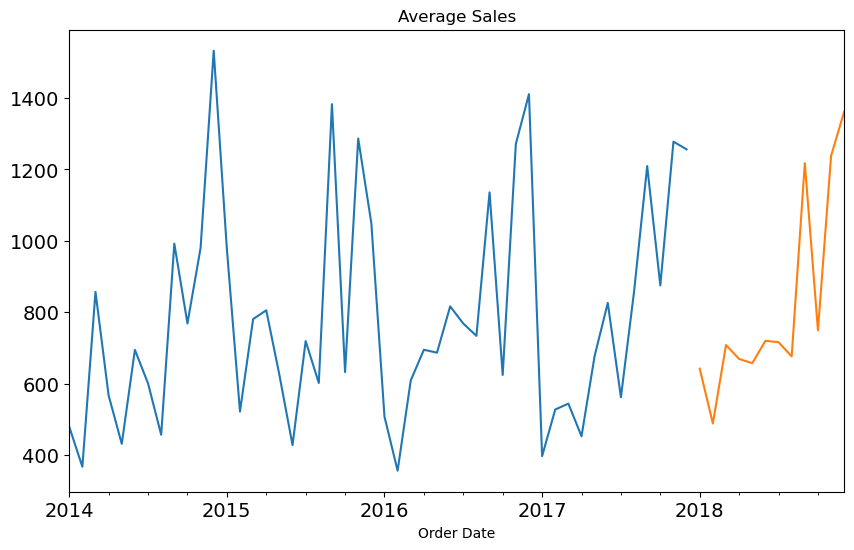

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods = gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend = 'add',seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)
y.plot(figsize=(10,6),title = 'Average Sales',fontsize=14)
Y_predictions.plot(figsize=(10,6),title = 'Average Sales',fontsize=14)
plt.show()

In [40]:
Y_predictions.to_csv("TimeSeriesOutput.csv",index=True)

In [41]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [42]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)

In [43]:
# pip install blosc2 ~= 2.0.0
# ! pip install pmdarima



In [44]:
import pmdarima as pm 

In [45]:
#Box-Jenkins Method :
# 1. Identification - to identify the optimum values for the parameters PDQ-auto_arima()
# 2. Estimation - build the model using optimum values 
# 3. Validation - interpret how good the model is by validation testing 
# 4. Forecasting - forecast for future time periods

In [48]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None,max_d=2,start_q=0,max_q=3,max_order=10,m=12,seasonal=True,information_criterion='aic',test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.20 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.06 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.27 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.08 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.29 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.65 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.49 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, Time=0.79 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=489.418, T

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

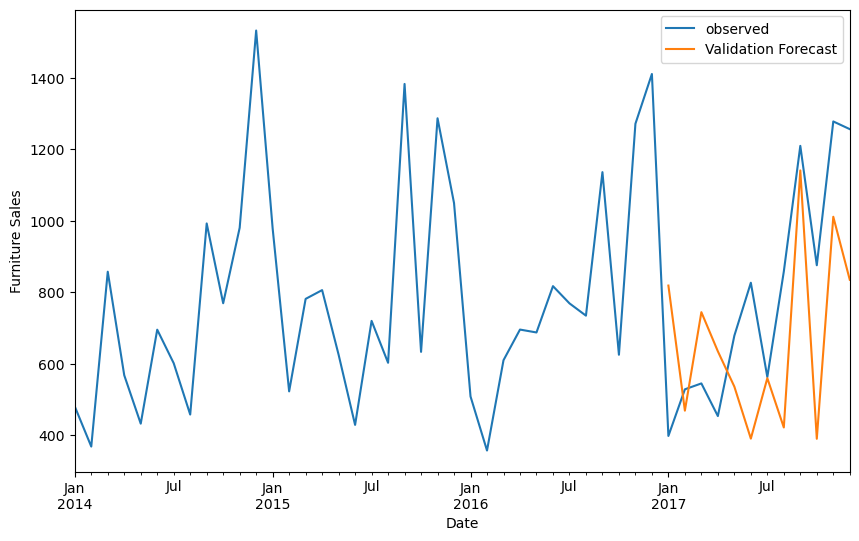

In [52]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()